In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sys

# Warnings remove 
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('bases/base_normal.csv')

del df['index']

df['Dia'] = pd.to_datetime(df['Dia'])
df = df.set_index('Dia')

#Calcula a taxa de retorno diaria de cada ativo
ret_diario = df.copy()
for ativo in df.columns: 
    ret_diario[ativo]=(df[ativo]/df[ativo].shift(1))-1

#Calcula a taxa de retorno anual de cada ativo, 
#considerando o primeiro dia util com valor do ativo e o ultimo dia util com valor do mesmo
ret_anual = pd.DataFrame()
ret_anual.set_index = list(df.index.year.unique())
for ativo in df.columns:
    anos = list(df[ativo].index.year.unique())
    index = []
    tx_anual = []
    for ano in anos:
        tx_retorno_ano = (df.loc[df[df.index.year == ano][ativo].index[-1]][ativo]/df.loc[df[df.index.year == ano][ativo].index[0]][ativo])-1
        index.append(ano)
        tx_anual.append(tx_retorno_ano)
    dff = pd.DataFrame({ativo:tx_anual}, index=index)
    ret_anual[ativo] = dff[ativo]
    
#Calcula a taxa de retorno anual logaritmica de cada ativo, 
#considerando o primeiro dia util com valor do ativo e o ultimo dia util com valor do mesmo
ret_anual_log = pd.DataFrame()
ret_anual_log.set_index = list(df.index.year.unique())
for ativo in df.columns:
    anos = list(df[ativo].index.year.unique())
    index = []
    tx_anual = []
    for ano in anos:
        tx_retorno_ano = np.log((df.loc[df[df.index.year == ano][ativo].index[-1]][ativo]/df.loc[df[df.index.year == ano][ativo].index[0]][ativo]))
        index.append(ano)
        tx_anual.append(tx_retorno_ano)
    dff = pd.DataFrame({ativo:tx_anual}, index=index)
    ret_anual_log[ativo] = dff[ativo]
    
# ret_anual df de retorno anual
# ret_anual_log df de retorno anual logaritmica
# ret_diario df de retorno diarios
# df base crua diaria

In [2]:
df = df[['A','AAL','AAP','AAPL','ABBV','ABC','ABMD','ABT','ACN','ADBE']].copy()

# Tabela de retornos
Objetivo é calcular os retornos possiveis se tivesse investido 5.000 dolares distriuido nestas ações a partir de 2021

In [3]:
df = df[df.index.year>=2021]
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE
Dia,,,,,,,,,,
2021-01-04,118.639999,15.13,157.339996,129.410004,105.410004,96.500000,316.730011,109.110001,256.459991,485.339996
2021-01-05,119.610001,15.43,157.169998,131.009995,106.500000,97.760002,322.600006,110.459999,257.920013,485.690002
2021-01-06,122.889999,15.52,166.250000,126.599998,105.580002,106.169998,321.609985,110.230003,260.739990,466.309998
2021-01-07,126.160004,15.38,167.669998,130.919998,106.709999,110.129997,323.559998,111.300003,263.200012,477.739990
2021-01-08,127.059998,15.13,170.059998,132.050003,107.269997,110.029999,324.059998,111.610001,264.160004,485.100006


# Alocação ativos

In [4]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos=[]):
    dataset = dataset.copy()
    
    np.random.seed(seed)
    
    if len(melhores_pesos) >0:
        pesos= melhores_pesos
    else:
        pesos = np.random.random(len(dataset.columns))
        pesos = pesos / pesos.sum()
        
    colunas = dataset.columns
    for i in colunas:
        dataset[i] = (dataset[i] / dataset[i][0])
        
    for i, acao in enumerate(dataset.columns):
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
        
    dataset['VALOR_TOTAL'] = dataset.sum(axis=1)
    dataset['TAXA_RETORNO'] = 0
    
    for i in range(1, len(dataset)):
        dataset['TAXA_RETORNO'][i] = ((dataset['VALOR_TOTAL'][i] / dataset['VALOR_TOTAL'][i-1])) -1
        
    acoes_pesos = pd.DataFrame({'Ativos':colunas, 'Pesos':pesos})
    
    return dataset, acoes_pesos, dataset['VALOR_TOTAL'][-1]

In [5]:
df_retorno, p, valor_final = alocacao_ativos(df, 5000, 10)

In [6]:
valor_final.round(2)

5558.49

In [7]:
p

,Ativos,Pesos
0,A,0.187493
1,AAL,0.005044
2,AAP,0.154027
3,AAPL,0.182019
4,ABBV,0.121177
5,ABC,0.054644
6,ABMD,0.048145
7,ABT,0.184870
8,ACN,0.041107
9,ADBE,0.021474


In [8]:
df_retorno

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,VALOR_TOTAL,TAXA_RETORNO
Dia,,,,,,,,,,,,
2021-01-04,937.462969,25.221915,770.135949,910.096102,605.885332,273.217802,240.725570,924.348888,205.537280,107.368194,5000.000000,0.000000
2021-01-05,945.127671,25.722020,769.303855,921.348288,612.150513,276.785211,245.186965,935.785692,206.707400,107.445623,5045.563237,0.009113
2021-01-06,971.045383,25.872051,813.747963,890.334301,606.862463,300.596202,244.434516,933.837233,208.967442,103.158327,5098.855881,0.010562
2021-01-07,996.884121,25.638669,820.698463,920.715374,613.357565,311.808039,245.916591,942.901966,210.939002,105.686901,5194.546691,0.018767
2021-01-08,1003.995643,25.221915,832.396852,928.662311,616.576371,311.524916,246.296608,945.528177,211.708377,107.315103,5229.226273,0.006676
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,1056.226180,23.321519,880.609919,1178.180933,792.691826,419.679519,203.719513,893.257708,245.449003,89.738961,5782.875082,-0.015452
2022-08-25,1074.716233,24.038336,885.896230,1195.762574,800.853822,425.880013,208.591334,897.069954,248.262041,89.358458,5850.428996,0.011682
2022-08-26,1026.199526,22.904766,849.675223,1150.683220,783.725128,413.903742,196.179966,863.267827,238.933293,84.290247,5629.762939,-0.037718


<AxesSubplot: xlabel='Dia'>

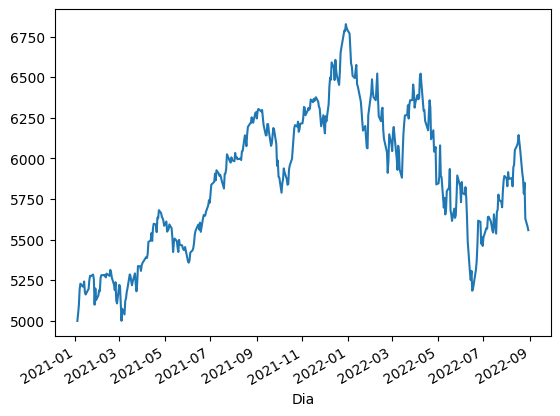

In [9]:
df_retorno['VALOR_TOTAL'].plot()

In [10]:
df_retorno['TAXA_RETORNO'].std() 

0.011570170828025805

# Sharpe Ratio
Combina o retorno do investimento comparado com o risco

Retorno acumulado em todo o periodo

In [11]:
df_retorno.loc[df_retorno.index[-1]]['VALOR_TOTAL'] / df_retorno.loc[df_retorno.index[0]]['VALOR_TOTAL'] -1

0.11169724716876361

# Desvio Padrão

In [12]:
df_retorno['TAXA_RETORNO'].std() 

0.011570170828025805

## Sharpe Ratio
Quanto maior melhor

In [13]:
(df_retorno['TAXA_RETORNO'].mean() / df_retorno['TAXA_RETORNO'].std()) * np.sqrt(246)

0.43421504990844517

In [14]:
#Risk Free
dinheiro_t = 5000
valor_final - dinheiro_t

558.4862358438177

In [15]:
taxa_selic_2021 =8
taxa_selic_2022 = 8



In [16]:
valor_2021= dinheiro_t + (dinheiro_t * taxa_selic_2021 / 100)
valor_2021

5400.0

# Alocação de Markowitz
https://www.suno.com.br/tudo-sobre/harry-markowitz/

In [130]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
    dataset = dataset.copy()

    if seed != 0:
        np.random.seed(seed)

    if len(melhores_pesos) > 0:
        pesos = melhores_pesos
    else:  
        pesos = np.random.random(len(dataset.columns))
        #print(pesos, pesos.sum())
        pesos = pesos / pesos.sum()
        #print(pesos, pesos.sum())

    colunas = dataset.columns
  #print(colunas)
    for i in colunas:
        dataset[i] = (dataset[i] / dataset[i][0])

    for i, acao in enumerate(dataset.columns):
        #print(i, acao)
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
    dataset['soma valor'] = dataset.sum(axis = 1)

    datas = dataset.index
    #print(datas)

    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
        dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

    acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

    return dataset, datas, acoes_pesos, dataset['soma valor'][-1]

In [131]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
    dataset = dataset.copy()
    dataset_original = dataset.copy()

    lista_retorno_esperado = []
    lista_volatilidade_esperada = []
    lista_sharpe_ratio = []

    melhor_sharpe_ratio = 1 - sys.maxsize
    melhores_pesos = np.empty
    melhor_volatilidade = 0
    melhor_retorno = 0

    for _ in range(repeticoes):
        pesos = np.random.random(len(dataset.columns))
        pesos = pesos / pesos.sum()

    for i in dataset.columns:
        dataset[i] = dataset[i] / dataset[i][0]

    for i, acao in enumerate(dataset.columns):
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
    

    retorno_carteira = np.log(dataset / dataset.shift(1))
    matriz_covariancia = retorno_carteira.cov()

    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
        dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

    #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

    if sharpe_ratio > melhor_sharpe_ratio:
        melhor_sharpe_ratio = sharpe_ratio
        melhores_pesos = pesos
        melhor_volatilidade = volatilidade_esperada
        melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)

    dataset = dataset_original.copy()

    return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [132]:
sharp_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno= alocacao_portfolio(df, 5000, 0.8, 1000)

In [137]:
df_retorno, pesos, total = alocacao_ativos(df, 5000, 0,melhores_pesos)


ValueError: too many values to unpack (expected 3)

In [115]:
total

5378.555384370207

In [116]:
total2

5401.319975291197

In [117]:
melhores_pesos

array([0.17703213, 0.04263402, 0.09203868, 0.0088958 , 0.00278885,
       0.23570623, 0.11550206, 0.08801705, 0.0464122 , 0.19097298])

In [118]:
total.round(2), total2.round(2), total.round(2) /total2.round(2)

(5378.56, 5401.32, 0.9957862152214645)

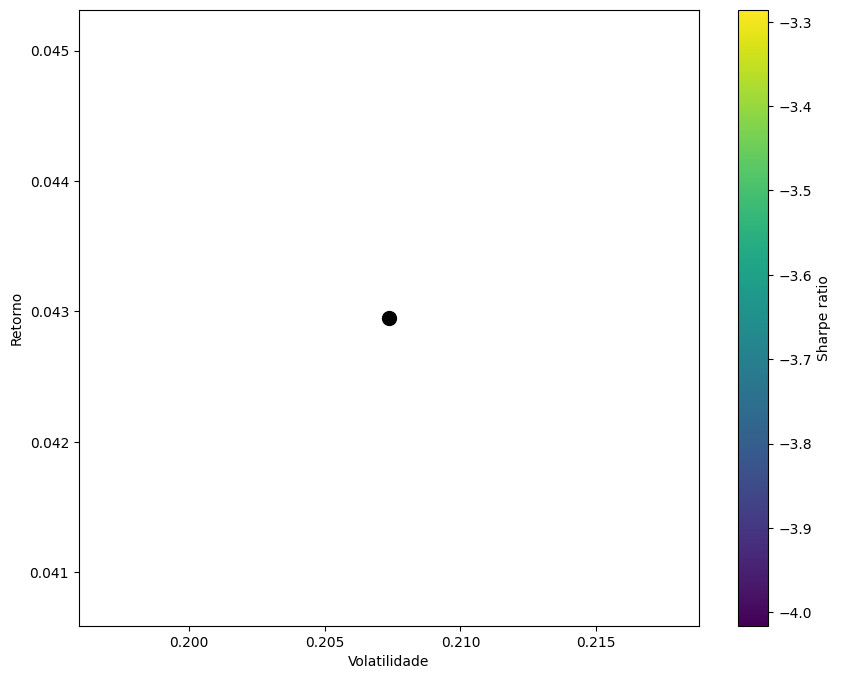

In [119]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c=ls_sharpe_ratio)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c= 'black', s=100)